# Your title for your regression project

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com). 

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- logerror
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- fullbathcnt
- garagecarcnt
- roomcnt
- yearbuilt
- taxvaluedollarcnt
- taxamount

### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [1]:
# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

- Filter out any from predictions_2016 that do not have a logerror. 
- Generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`
- (optional) `regionidzip`

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 


In [ ]:
# env.py file located at:
# zillow_path

# add in the code from earlier lessons on how to link to env file at this point
# until then, continue on, dump data in as CSV files and work the project.
# Fix env logic last

In [131]:
# loading properties dataset from csv file:
path = '/Users/rachelreuter/Codeup-DS-projects/'
df_properties_dump = pd.read_csv(path + 'properties_2016.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [132]:
# loading predictions dataset from csv file:
path = '/Users/rachelreuter/Codeup-DS-projects/'
df_prediction_dump = pd.read_csv(path + 'train_2016_v2.csv')

In [105]:
# # creating data from from the propeties.csv load:
# df_a = pd.DataFrame(df_properties_dump, columns = [
#       'parcelid',
#       'bathroomcnt',
#       'bedroomcnt',
#       'calculatedfinishedsquarefeet',
#       'regionidzip',
#       'roomcnt',
#       'yearbuilt',
#       'taxvaluedollarcnt',
#       'taxamount'])

In [303]:
# creating data from from the propeties.csv load:
df_a = pd.DataFrame(df_properties_dump, columns = [
      'parcelid',
      'calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount'])


In [304]:
# creating data from from the predictions.csv load:
df_b = pd.DataFrame(df_prediction_dump, columns = [
      'parcelid',
      'logerror'])

In [305]:
# joining the two data frames to create the working data frame:
df_join = pd.merge(df_a, df_b, on='parcelid')

#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

In [306]:
# peek at first few rows:
df_join.head()

,parcelid,calculatedfinishedsquarefeet,lotsizesquarefeet,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror
0,17073783,1264.0,1735.0,191811.0,115087.0,76724.0,2015.06,0.0953
1,17088994,777.0,NaN,239679.0,143809.0,95870.0,2581.30,0.0198
2,17100444,1101.0,6569.0,47853.0,33619.0,14234.0,591.64,0.0060
3,17102429,1554.0,7400.0,62914.0,45609.0,17305.0,682.78,-0.0566
4,17109604,2415.0,6326.0,554000.0,277000.0,277000.0,5886.92,0.0573


#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

In [326]:
# summary information for data frame and associated columns:
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())    

In [308]:
summarize_df(df_join)


Rows & Columns:

(90275, 8)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 8 columns):
parcelid                        90275 non-null int64
calculatedfinishedsquarefeet    89614 non-null float64
lotsizesquarefeet               80125 non-null float64
taxvaluedollarcnt               90274 non-null float64
structuretaxvaluedollarcnt      89895 non-null float64
landtaxvaluedollarcnt           90274 non-null float64
taxamount                       90269 non-null float64
logerror                        90275 non-null float64
dtypes: float64(7), int64(1)
memory usage: 6.2 MB
None

First 5 rows:

   parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0             1735.0   
1  17088994                         777.0                NaN   
2  17100444                        1101.0             6569.0   
3  17102429                        1554.0             7400.0   
4  17109604        

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

In [327]:
# applying lambda function to fill any "na" fields with the mean for those respective columns:
df_join = df_join.apply(lambda x: x.fillna(x.mean()),axis=0)

In [328]:
# removing outliers beyond three standard deviations from all columns:
df_fixed = df_join[(np.abs(stats.zscore(df_join)) < 3).all(axis=1)]

#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

In [329]:
# view summary of this new fixed data frame, now with blanks filled with means and outliers removed:
summarize_df(df_fixed)


Rows & Columns:

(85253, 8)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85253 entries, 0 to 90274
Data columns (total 8 columns):
parcelid                        85253 non-null int64
calculatedfinishedsquarefeet    85253 non-null float64
lotsizesquarefeet               85253 non-null float64
taxvaluedollarcnt               85253 non-null float64
structuretaxvaluedollarcnt      85253 non-null float64
landtaxvaluedollarcnt           85253 non-null float64
taxamount                       85253 non-null float64
logerror                        85253 non-null float64
dtypes: float64(7), int64(1)
memory usage: 5.9 MB
None

First 5 rows:

   parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0        1735.000000   
1  17088994                         777.0       29110.164177   
2  17100444                        1101.0        6569.000000   
3  17102429                        1554.0        7400.000000   
4  17109604        

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

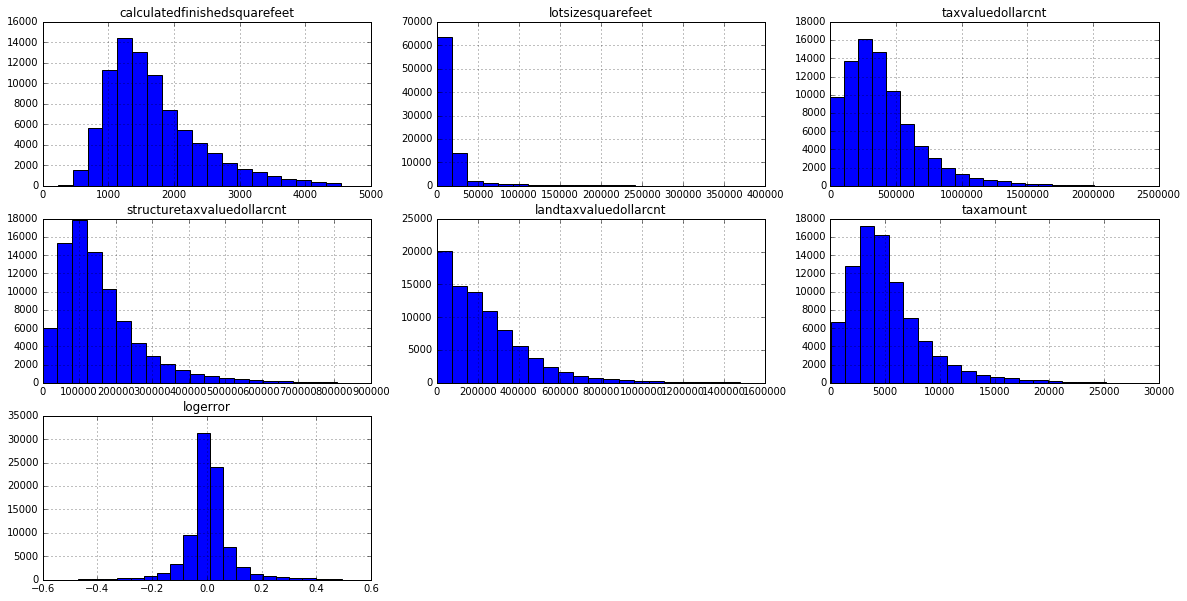

In [330]:
# histograms of all variables in dataframe, minus room count and region id zip:

plt.figure(figsize=(20,10))
for i, col in enumerate(['calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'logerror']):
    plot_number = i + 1
    series = df_fixed[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=False)

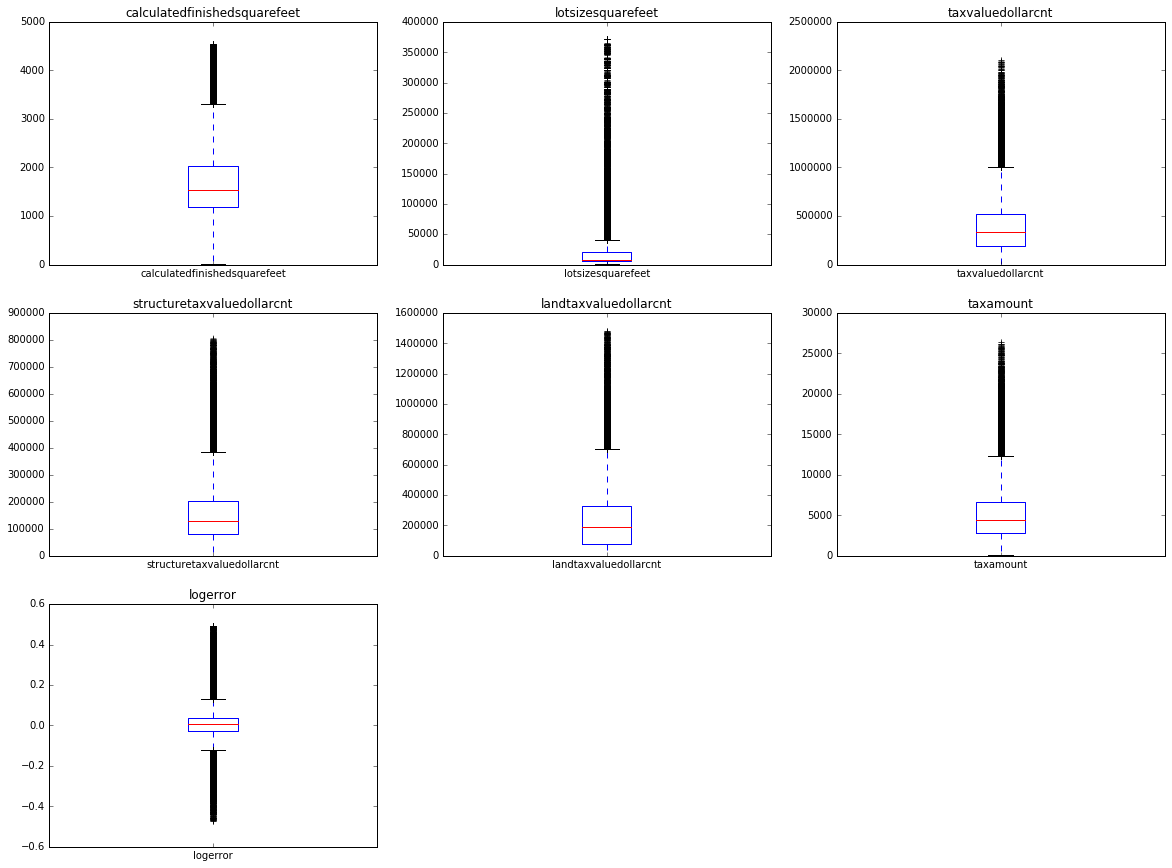

In [313]:
plt.figure(figsize=(20,20))
for i, col in enumerate([
      'calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'logerror']):
    plot_number = i + 1
    series = df_fixed[col]
    plt.subplot(4, 3, plot_number)
    plt.title(col)
    series.plot.box()

#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [314]:
columns = pd.DataFrame(df_fixed.columns, columns=['variable_name'])
columns

,variable_name
0,parcelid
1,calculatedfinishedsquarefeet
2,lotsizesquarefeet
3,taxvaluedollarcnt
4,structuretaxvaluedollarcnt
5,landtaxvaluedollarcnt
6,taxamount
7,logerror


#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [315]:
x_vars = columns
x_vars

,variable_name
0,parcelid
1,calculatedfinishedsquarefeet
2,lotsizesquarefeet
3,taxvaluedollarcnt
4,structuretaxvaluedollarcnt
5,landtaxvaluedollarcnt
6,taxamount
7,logerror


#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

In [317]:
# dependent variable is logerror
y = df_fixed.columns.values[7]
y

'logerror'

In [318]:
# continuous
continuous = df_fixed[['logerror']]
continuous

,logerror
0,0.0953
1,0.0198
2,0.0060
3,-0.0566
4,0.0573
5,0.0564
6,0.0315
7,0.0257
8,0.0020
9,-0.0576


#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

# at the step below, experiement with adding, removing, combining new fields, and then rerun all, and then run OLS to see if it improves the R-square and pvalue.  Can do this multiple times until I get the right fit of fields in the OLS to generate better R^2 and p values.

# add this in later into the modeling stage:
# to create a price per sq foot field:
    
# df_fixed['pp_sqft'] = (df_join.taxvaluedollarcnt / df_join.calculatedfinishedsquarefeet)

In [354]:
X = df_fixed.drop(['parcelid', 'logerror', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt'], axis=1)
y = df_fixed[['logerror']]

print(X.head())
print(y.head())

# [
#       'calculatedfinishedsquarefeet',
#       'lotsizesquarefeet',

#       'taxvaluedollarcnt',
#       'structuretaxvaluedollarcnt',

#       'landtaxvaluedollarcnt',

#       'taxamount']


   calculatedfinishedsquarefeet  lotsizesquarefeet  taxvaluedollarcnt  \
0                        1264.0        1735.000000           191811.0   
1                         777.0       29110.164177           239679.0   
2                        1101.0        6569.000000            47853.0   
3                        1554.0        7400.000000            62914.0   
4                        2415.0        6326.000000           554000.0   

   taxamount  
0    2015.06  
1    2581.30  
2     591.64  
3     682.78  
4    5886.92  
   logerror
0    0.0953
1    0.0198
2    0.0060
3   -0.0566
4    0.0573


In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'taxvaluedollarcnt', 'taxamount', 'logerror']
Train dimensions (rows, columns): (68202, 5)


Test columns:  ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'taxvaluedollarcnt', 'taxamount', 'logerror']
Test dimensions (rows, columns): (17051, 5)


In [356]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.80
Test Split: 0.20


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

In [344]:
# with sns.axes_style('white'):
#     j = sns.jointplot('bedroomcnt', 'logerror', data=train, kind='reg', height=7);
#     j.annotate(stats.pearsonr)
# plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


KeyError: 'taxamount'

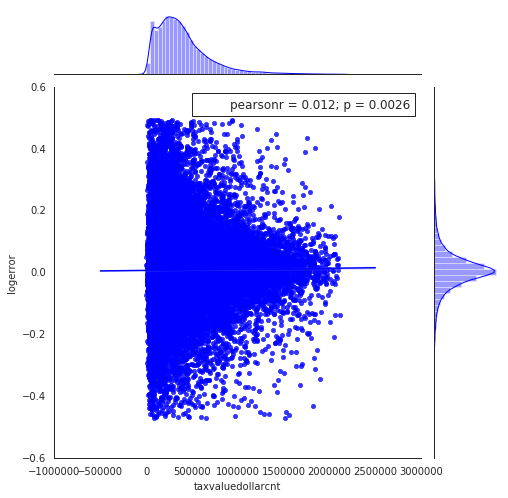

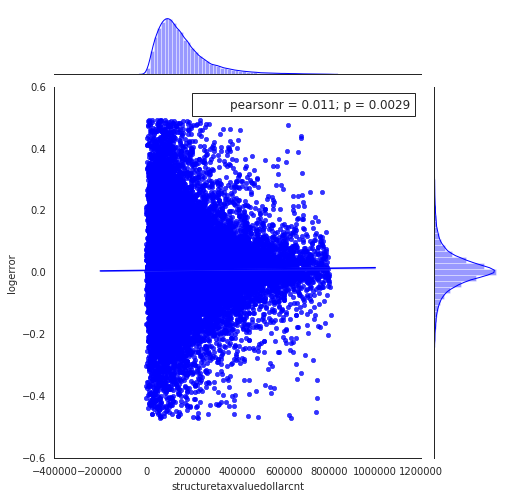

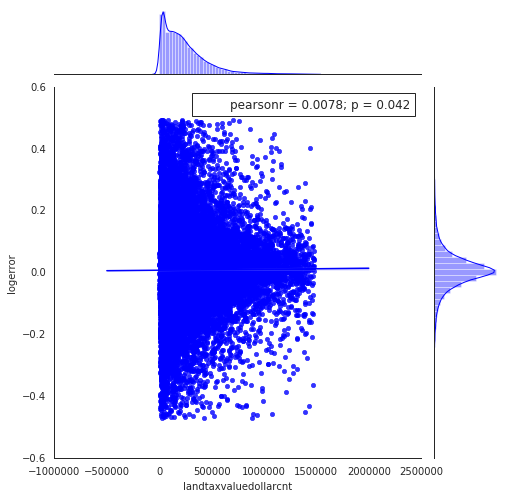

In [345]:
for i, col in enumerate(['taxvaluedollarcnt', 'structuretaxvaluedollarcnt',
                         'landtaxvaluedollarcnt', 'taxamount']):
    with sns.axes_style('white'):
            plot_number = i + 1
            series = df_fixed[col]
            j = sns.jointplot(train[col], 'logerror', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()


#(['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']):

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

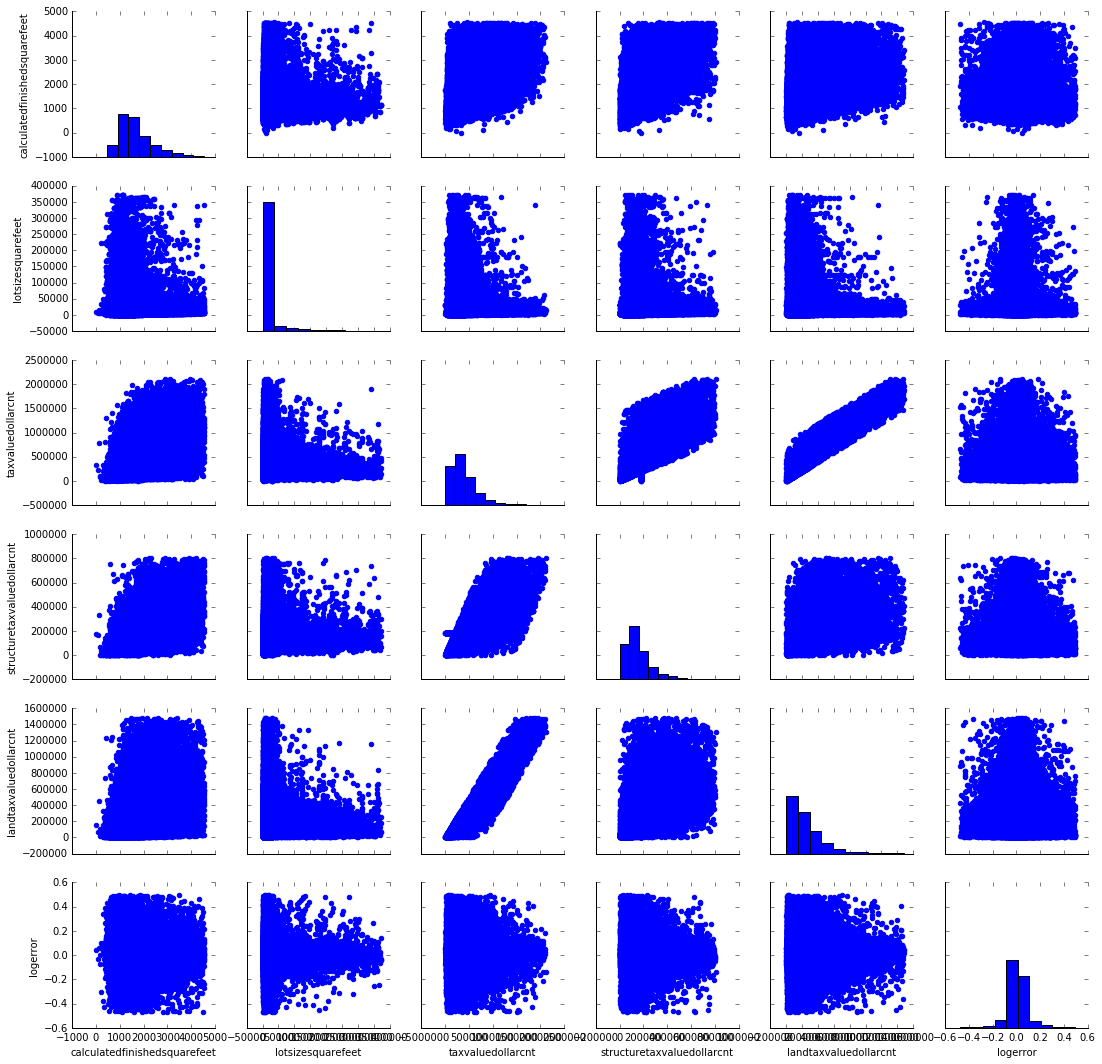

In [347]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### Create a heatmap of the correlation between each variable pair.

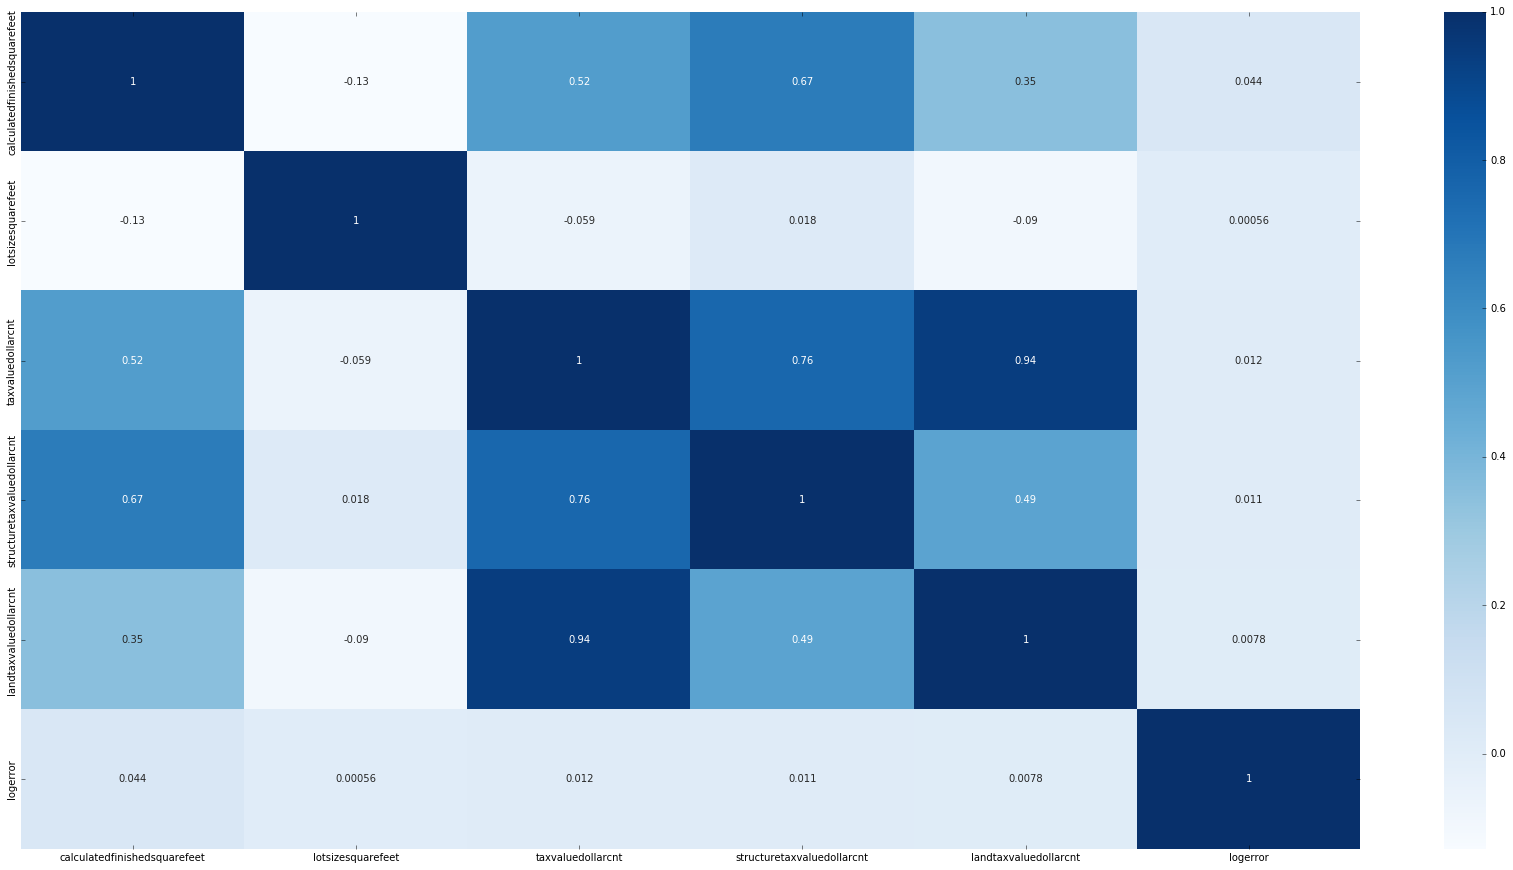

In [348]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [357]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     276.7
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.18e-236
Time:                        16:48:11   Log-Likelihood:                 69920.
No. Observations:               68202   AIC:                        -1.398e+05
Df Residuals:                   68198   BIC:                        -1.398e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinishedsquarefeet  8.046e-06   3.81e-07     21.117      0.000     7.3e-06    8.79e-06
lotsizesquarefeet             1.361e-08   7.91e-09      1.720      0.086    -1.9e-09    2.91e-08
taxvaluedollarcnt             4.355e-08   2.83e-09     15.371      0.000     3.8e-08    4.91e-08
taxamount                    -4.453e-06    2.3e-07    -19.402      0.000    -4.9e-06      -4e-06
==============================================================================
Omnibus:                    11105.680   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123651.226
Skew:                           0.441   Prob(JB):                         0.00
Kurtosis:                       9.537   Cond. No.                         579.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Summarize your conclusions from all of these steps.  

## fill this in

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [358]:
three_br = train[train.bedroomcnt == 3]
five_br = train[train.bedroomcnt >= 5]

from scipy.stats import ttest_ind
ttest_ind(three_br.logerror, five_br.logerror)

AttributeError: 'DataFrame' object has no attribute 'bedroomcnt'

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [252]:
two_bath = train[train.bathroomcnt <= 2.5]
three_or_more_bath = train[train.bathroomcnt > 2.5]

from scipy.stats import ttest_ind
ttest_ind(two_bath.logerror, three_or_more_bath.logerror)

Ttest_indResult(statistic=-8.777020659982796, pvalue=1.7163085647242157e-18)

In [253]:
lt_200k = train[train.taxvaluedollarcnt <= 200_000]
gt_200k = train[train.taxvaluedollarcnt > 200_000]

from scipy.stats import ttest_ind
ttest_ind(lt_200k.logerror, gt_200k.logerror)

Ttest_indResult(statistic=0.8285486842679824, pvalue=0.4073627226781825)

In [265]:
lt_200k = train[train.taxvaluedollarcnt <= 200_000]
gt_200k = train[train.taxvaluedollarcnt > 200_000]

pearsonr(X_train[['bathroomcnt']], y_train)

#'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'regionidzip']):

# R^2 greater than .5,  92.1% of the variance in total charges is explained by tenure.
#print("Pearson's R is __ with a significance p-value of __")


(array([0.04320241]), array([1.14368066e-29]))

In [241]:
columns

,variable_name
0,parcelid
1,bathroomcnt
2,bedroomcnt
3,calculatedfinishedsquarefeet
4,regionidzip
5,roomcnt
6,yearbuilt
7,taxvaluedollarcnt
8,taxamount
9,logerror


### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 

In [256]:
X_train['pp_sqft'] = (X_train.taxvaluedollarcnt / X_train.calculatedfinishedsquarefeet)
X_train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,pp_sqft
60699,2.5,3.0,2327.0,97107.0,2006.0,382506.0,164.377310
39650,3.0,3.0,1624.0,96389.0,1979.0,512000.0,315.270936
9550,2.0,4.0,2055.0,97107.0,1989.0,412812.0,200.881752
59011,3.0,4.0,2000.0,97328.0,1987.0,187952.0,93.976000
68323,2.0,4.0,1686.0,96180.0,1955.0,89953.0,53.352906


#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

In [254]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.26e-155
Time:                        14:30:56   Log-Likelihood:                 70020.
No. Observations:               68498   AIC:                        -1.400e+05
Df Residuals:                   68492   BIC:                        -1.400e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                      0.0020      0.001      3.076      0.002       0.001       0.003
bedroomcnt                       0.0002      0.000      0.483      0.629      -0.001       0.001
calculatedfinishedsquarefeet  5.478e-06   7.65e-07      7.157      0.000    3.98e-06    6.98e-06
regionidzip                  -9.063e-07   3.64e-07     -2.492      0.013   -1.62e-06   -1.94e-07
yearbuilt                     4.289e-05   1.79e-05      2.391      0.017    7.73e-06     7.8e-05
taxvaluedollarcnt            -8.657e-09   1.33e-09     -6.530      0.000   -1.13e-08   -6.06e-09
==============================================================================
Omnibus:                    10971.682   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121258.683
Skew:                           0.428   Prob(JB):                         0.00
Kurtosis:                       9.462   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
need to go back and look at new fields.

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)

#### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  

#### Predict & evaluate on out-of-sample data (test)    
X_test['pp_sqft'] = (X_test.taxvaluedollarcnt / X_test.calculatedfinishedsquarefeet)
X_test.head()

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [ ]:
# add this in later into the modeling stage:
# to create a price per sq foot field:
    
# df_fixed['pp_sqft'] = (df_join.taxvaluedollarcnt / df_join.calculatedfinishedsquarefeet)

#  the low R values with the fields we've chosen (see OLS above), will likely have higher coefficients in the next modeling step, see next step and how to fit the model to the training data (see step 121 on previous tab, search for " start here on problem 3.d. on Wednesday morning")...

# meaning the higher coefficients will be driving the error, HENCE the error scores and low R squared values, BECAUSE we're actually looking for a value like total_charges, rather we're looking for what's driving the ERRORs themselves, not a value.... but the errors, ie what's driving the errors.

# We'll look at the SQL reproducibility next week.

In [ ]:
# ensure notebook is reproducible.  Dump unneeded cells.